In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
company_data=pd.read_csv('50_startups.csv')
company_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
company_data.shape

(50, 5)

In [4]:
company_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
company_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
del company_data['State']
company_data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


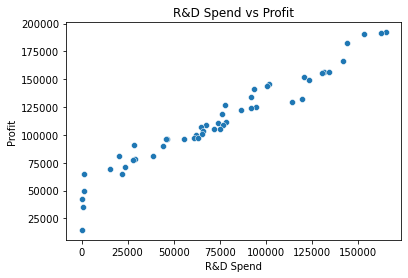

In [8]:
sns.scatterplot(x='R&D Spend',y='Profit',data=company_data )
plt.title('R&D Spend vs Profit')
plt.show()


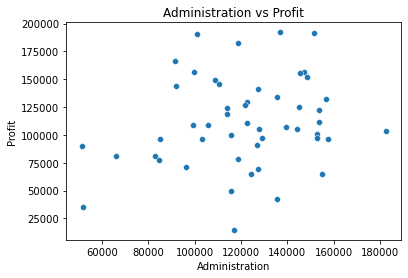

In [9]:
sns.scatterplot(x='Administration',y='Profit',data=company_data )
plt.title('Administration vs Profit')
plt.show()


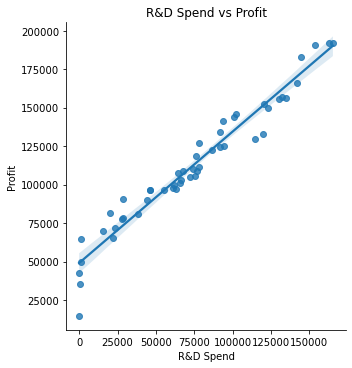

In [10]:
sns.lmplot(x='R&D Spend',y='Profit',data=company_data )
plt.title('R&D Spend vs Profit')
plt.show()


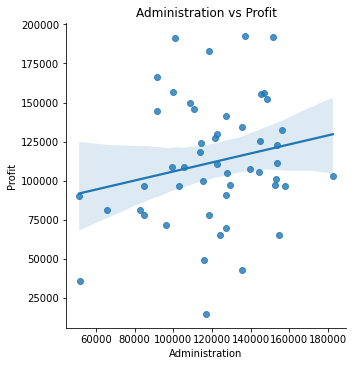

In [11]:
sns.lmplot(x='Administration',y='Profit',data=company_data )
plt.title('Administration vs Profit')
plt.show()


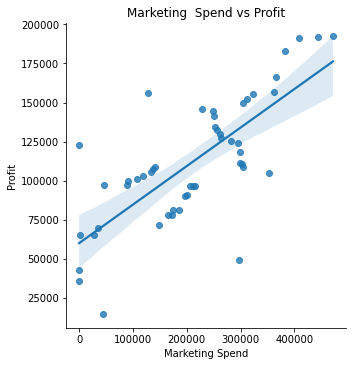

In [12]:
sns.lmplot(x='Marketing Spend',y='Profit',data=company_data )
plt.title('Marketing  Spend vs Profit')
plt.show()


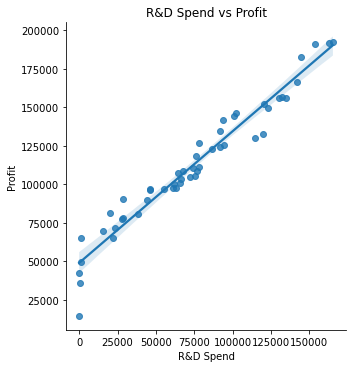

In [13]:
sns.lmplot(x='R&D Spend',y='Profit',data=company_data )
plt.title('R&D Spend vs Profit')
plt.show()


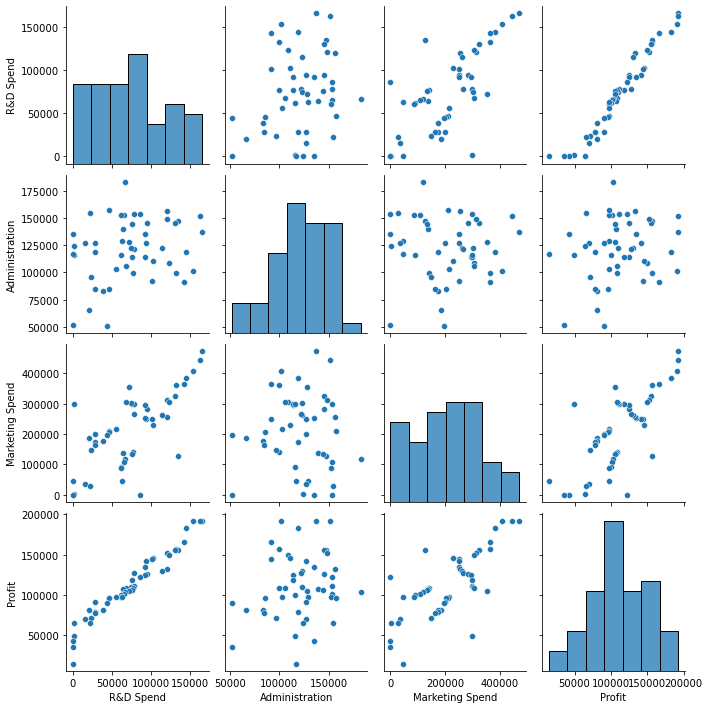

In [14]:
sns.pairplot(data=company_data)
plt.show()

In [15]:
company_data.rename(columns={'R&D Spend':'rd','Administration':'ad','Marketing Spend':'ms','Profit':'profit'},inplace=True)
company_data

,rd,ad,ms,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [16]:
company_data.corr()

,rd,ad,ms,profit
rd,1.000000,0.241955,0.724248,0.972900
ad,0.241955,1.000000,-0.032154,0.200717
ms,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


### From the above correlation matrix we can say that rd and profit have a pretty high correlation followed by ms and profit , and ms and rd


### building model

In [17]:
model_1=smf.ols('profit ~ rd+ms+ad',data=company_data).fit()
model_1

In [18]:
model_1.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [19]:
model_1.params

Intercept    50122.192990
rd               0.805715
ms               0.027228
ad              -0.026816
dtype: float64

In [20]:
company_data['prediction_manual']=50122+0.805715*company_data['rd']+0.027228*company_data['ms']-0.026816*company_data['ad']
company_data['Prediction']=model_1.fittedvalues
company_data['Error_manual']=company_data['profit']-company_data['prediction_manual']
company_data['Error']=model_1.resid
company_data['Mean_squared_error']=(company_data['Error'])**2
company_data

,rd,ad,ms,profit,prediction_manual,Prediction,Error_manual,Error,Mean_squared_error
0,165349.20,136897.80,471784.10,192261.83,192521.016748,192521.252890,-259.186748,-259.422890,6.730024e+04
1,162597.70,151377.59,443898.53,191792.06,189156.533577,189156.768232,2635.526423,2635.291768,6.944763e+06
2,153441.51,101145.55,407934.54,191050.39,182147.048816,182147.279096,8903.341184,8903.110904,7.926538e+07
3,144372.41,118671.85,383199.62,182901.99,173696.471247,173696.700026,9205.518753,9205.289974,8.473736e+07
4,142107.34,91391.77,366168.42,166187.94,172139.287484,172139.514183,-5951.347484,-5951.574183,3.542124e+07
5,131876.90,99814.71,362861.36,156991.12,163580.554330,163580.780571,-6589.434330,-6589.660571,4.342363e+07
6,134615.46,147198.87,127716.82,156122.51,158113.884031,158114.096669,-1991.374031,-1991.586669,3.966417e+06
7,130298.13,145530.06,323876.68,155752.60,160021.137967,160021.363048,-4268.537967,-4268.763048,1.822234e+07
8,120542.52,148718.95,311613.29,152211.77,151741.475799,151741.699699,470.294201,470.070301,2.209661e+05
9,123334.88,108679.17,304981.62,149759.96,154884.461766,154884.684110,-5124.501766,-5124.724110,2.626280e+07


In [21]:
company_data['Mean_squared_error'].mean()

78417126.0191308

In [22]:
print(model_1.tvalues, np.round(model_1.pvalues,5))

Intercept     7.626218
rd           17.846374
ms            1.655077
ad           -0.525507
dtype: float64 Intercept    0.00000
rd           0.00000
ms           0.10472
ad           0.60176
dtype: float64


In [23]:
(model_1.rsquared,model_1.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

#### From the above calculations we can say that 'ms' and 'ad' have high p values . Hence both are insignificant variables. Hence will try model with SLR techniques with significant variables¶

In [24]:
model_1_slr_a=smf.ols('profit ~ ad',data=company_data).fit()
model_1_slr_a

In [25]:
model_1_slr_b=smf.ols('profit ~ ms',data=company_data).fit()
model_1_slr_b

In [26]:
model_1_slr_a.tvalues ,model_1_slr_a.pvalues,model_1_slr_b.rsquared


(Intercept    3.040044
 ad           1.419493
 dtype: float64,
 Intercept    0.003824
 ad           0.162217
 dtype: float64,
 0.5591535746115515)

In [27]:
model_1_slr_b.tvalues,(np.round(model_1_slr_b.pvalues,10)),model_1_slr_b.rsquared

(Intercept    7.808356
 ms           7.802657
 dtype: float64,
 Intercept    4.000000e-10
 ms           4.000000e-10
 dtype: float64,
 0.5591535746115515)

In [28]:
model_1_mlr_a=smf.ols('profit ~ ms+ad',data=company_data).fit()
model_1_mlr_a

In [29]:
model_1_mlr_a.tvalues,model_1_mlr_a.pvalues,model_1_mlr_a.rsquared

(Intercept    1.142741
 ms           8.281039
 ad           2.467779
 dtype: float64,
 Intercept    2.589341e-01
 ms           9.727245e-11
 ad           1.729198e-02
 dtype: float64,
 0.6097229746770664)

### Calculating VIF (collinearity check)


In [30]:
rsq_ms=smf.ols('ms ~ ad+rd',data=company_data).fit().rsquared
vif_ms=1/(1-rsq_ms)
vif_ms

2.326773290530878

In [31]:
rsq_ad=smf.ols('ad ~ ms+rd',data=company_data).fit().rsquared
vif_ad=1/(1-rsq_ad)
vif_ad


1.1750910070550455

In [32]:
rsq_rd=smf.ols('rd ~ ad+ms',data=company_data).fit().rsquared
vif_rd=1/(1-rsq_rd)
vif_rd

2.4689030699947017

In [33]:
d1={'variables':['ms','ad','rd'],'VIF':[vif_ms,vif_ad,vif_rd]}
vif_frame=pd.DataFrame(d1)
vif_frame

,variables,VIF
0,ms,2.326773
1,ad,1.175091
2,rd,2.468903


In [34]:
import statsmodels.api as sm

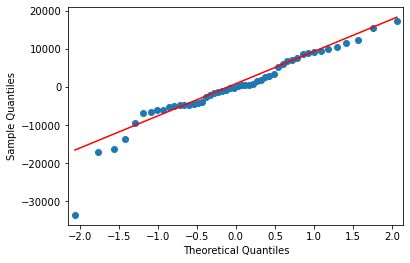

In [35]:
sm.qqplot(model_1.resid,line='q')
plt.show()

<AxesSubplot:>

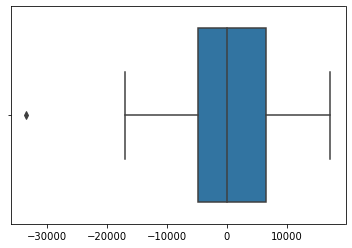

In [36]:
sns.boxplot(model_1.resid)

<AxesSubplot:xlabel='Error_manual', ylabel='Density'>

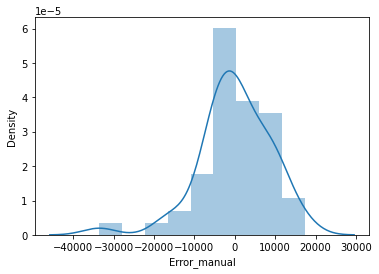

In [37]:
sns.distplot(company_data['Error_manual'])

<AxesSubplot:xlabel='Error_manual', ylabel='Count'>

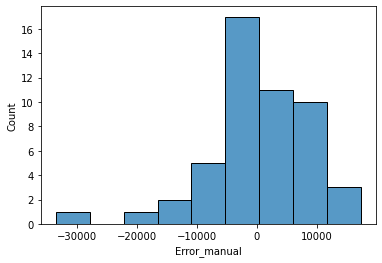

In [38]:
sns.histplot(company_data['Error_manual'])

### To find High influence plots

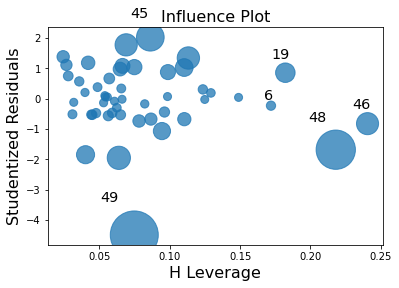

In [39]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_1)
plt.show()

In [40]:
list(np.where(model_1.resid<-10000))

[array([14, 15, 48, 49], dtype=int64)]

In [41]:
def get_standardized_values(vals):
        return(vals-vals.mean())/vals.std()

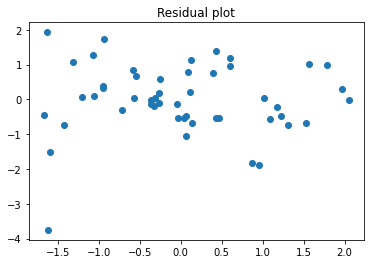

In [42]:
plt.scatter(get_standardized_values(model_1.fittedvalues),
           get_standardized_values(model_1.resid))
plt.title('Residual plot')
plt.show()

### Cooks Distance

In [43]:
model_1_influence=model_1.get_influence()
(c,_)=model_1_influence.cooks_distance

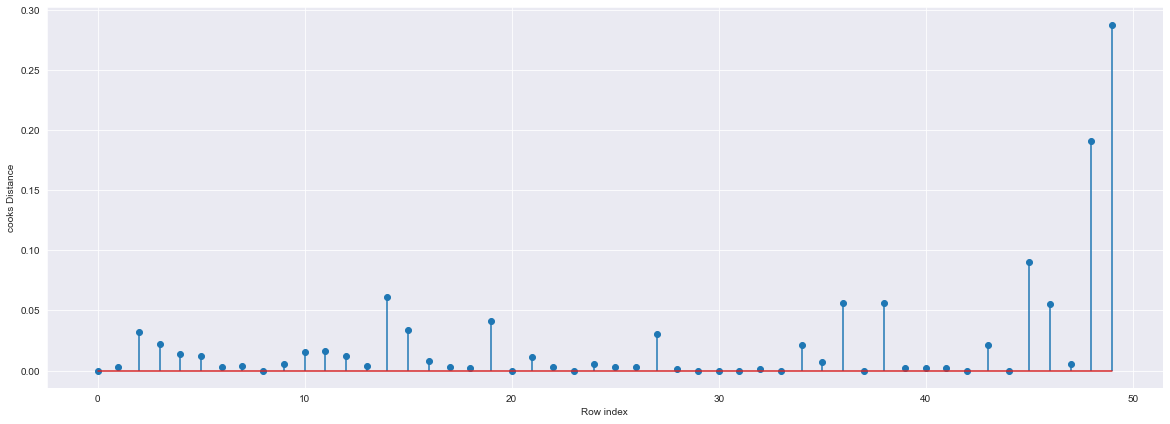

In [44]:
sns.set_style(style='darkgrid')
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(company_data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks Distance')
plt.show()

In [45]:
(np.argmax(c),np.max(c))

(49, 0.288082292754327)

In [46]:
company_data1=pd.read_csv("C:\\Users\\Admin\\Downloads\\50_Startups.csv")
company_data1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [47]:
company_data1.shape

(50, 5)

### 49 is high influence data point,so we need to drop this

In [48]:
company_data2=company_data1.drop(company_data1.index[[49]],axis=0).reset_index(drop=True)
company_data2

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [49]:
company_data2.rename(columns={'R&D Spend':'rd','Administration':'ad','Marketing Spend':'ms','Profit':'profit'},inplace=True)
company_data2

,rd,ad,ms,State,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [50]:
final_model=smf.ols(('profit ~ rd+ad+ms '),data=company_data2).fit()
final_model

In [51]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           8.85e-32
Time:                        19:43:07   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rd             0.7830      0.038     20.470      0.000       0.706       0.860
ad            -0.0222      0.043     -0.518      0.607      -0.109       0.064
ms             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R squared value of final model is 0.961 which is a pretty good value


### Model predictions

In [52]:
new_data=pd.DataFrame({'rd':75000,'ad':10000,'ms':20000},index=[1])
new_data

,rd,ad,ms
1,75000,10000,20000


In [53]:
final_model.predict(new_data)

1    111390.238409
dtype: float64

In [54]:
pred_y=final_model.predict(company_data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [55]:
d2={'prepared models':['model_1','final_model'],'Rsquared':['0.95','0.96']}
table=pd.DataFrame(d2)
table
    

,prepared models,Rsquared
0,model_1,0.95
1,final_model,0.96
